<h1>Decision Tree</h1>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#Decision Tree
* 트리 구조 분류 알고리즘
* 스무고개 놀이와 유사
  * 예/아니오 질문을 이어 나가면서 학습
* 결정 규칙
  * 정보 균일도가 높게 하는 특성(feature)과 임계 값(Threshold)
* 정보 균일도:분류된 세트에 포함된 정보가 비슷한 정도
  * 지니(Gini)
  * 엔트로피(Entropy)

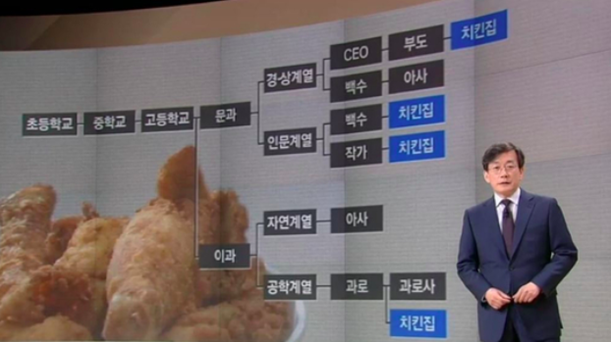


## CART 알고리즘-1
* CART(Classification And Regression Tree)
* 하나의 특성 $k$의 임계 값 $t$를 정해서 두개의 서브 세트로 나눔
  * 정보 균일도가 가장 높은 $k$와 $k$를 선정
* $J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
  * $G_{left/right}$ : 왼쪽 또는 오른쪽 서브 세트의 정보 균일도
  * $m_{left/right}$ : 왼쪽 또는 오른쪽 서브 세트의 샘플 수

## CART 알고리즘-2
* 토핑 골라서 케잌 자르기
  * 가로축, 세로축을 기준으로 직선으로 단 한번만 자를 수 있다.
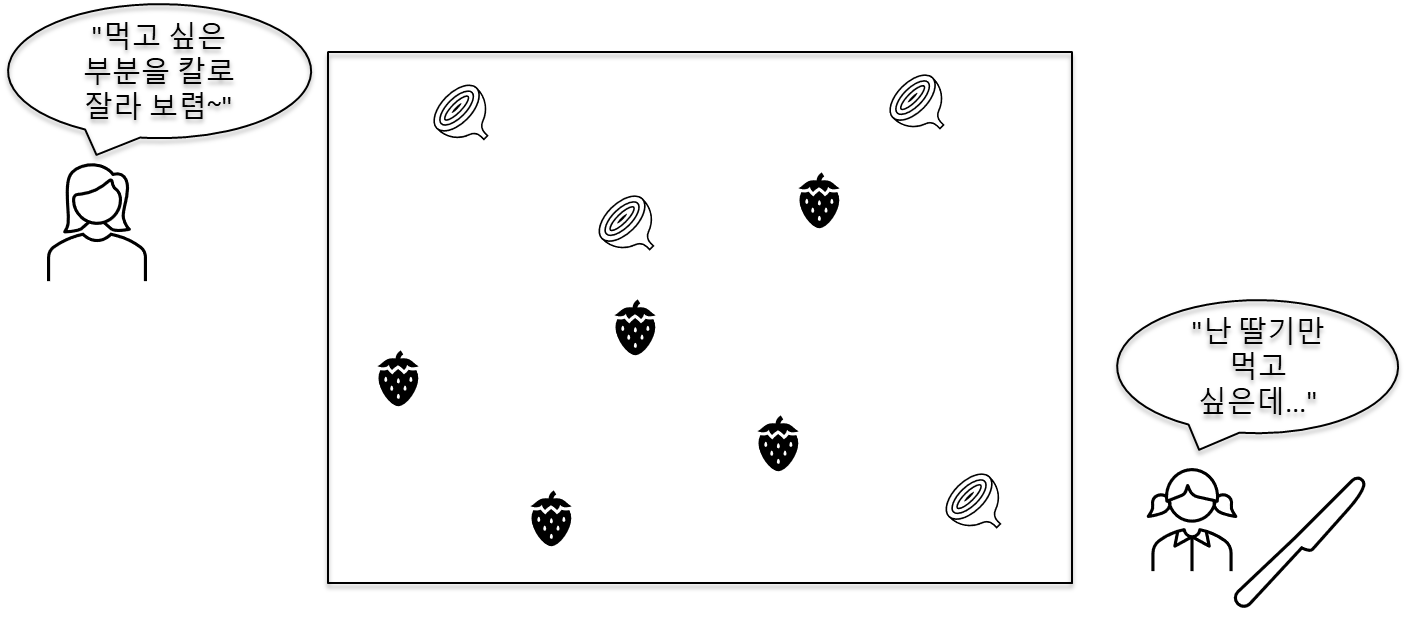

## CART 알고리즘-3
* 토핑 골라서 케잌 자르기
  * 나눠진 영역은 같은 토핑으로만 채워져 있다.
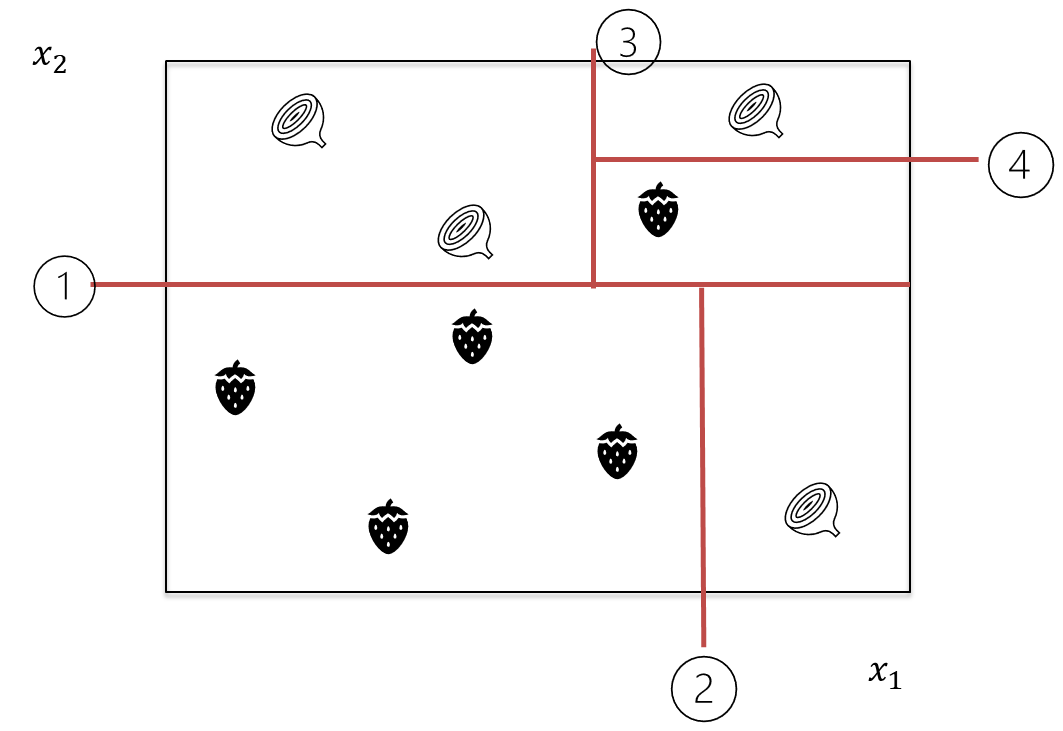

## CART 알고리즘-4
* 토핑 골라서 케잌 자르기
  * n차원 케잌도 기억 할 수 있는 그림으로 바꾸기
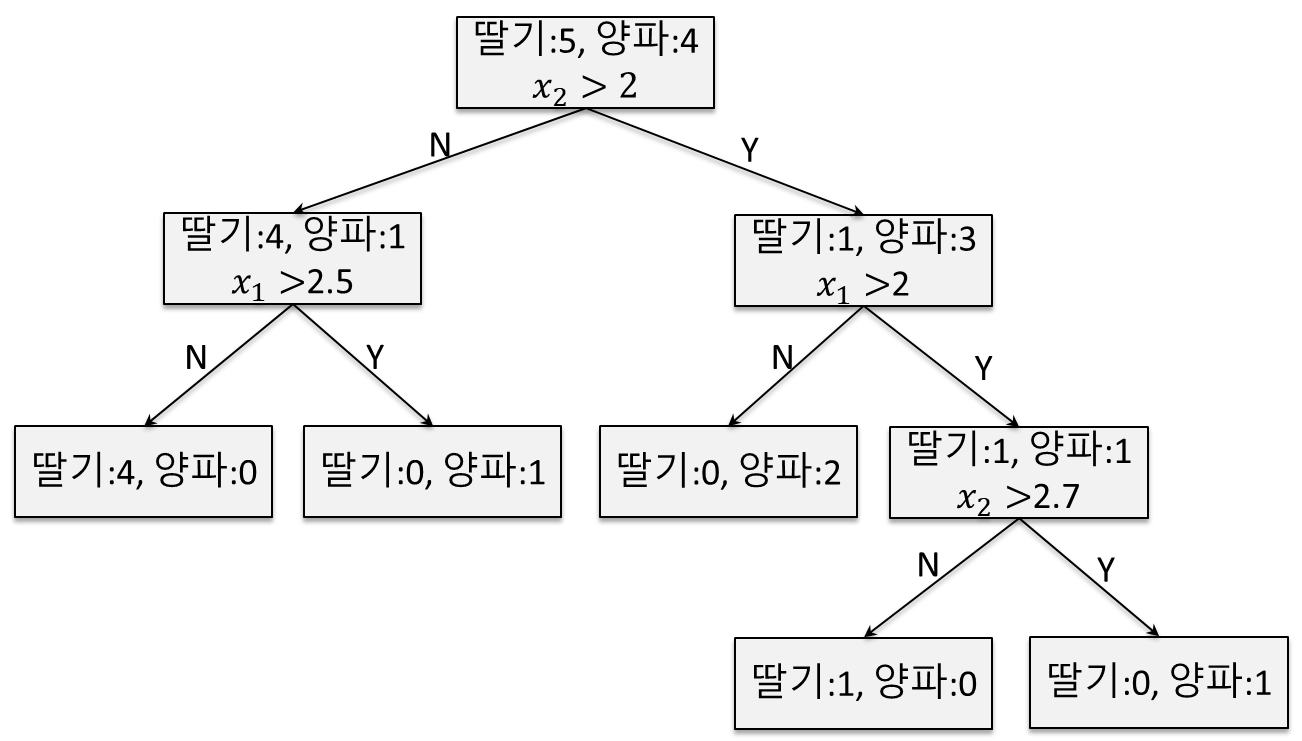

## Gini
* 지니 계수
  * 경제학, 불평등 지수(경제학자 Corrado Gini)
    * 0=평등, 1=불평등
    * 지니계수가 낮을 수록 정보 균일도가 높다.
* Gini 불순도(impurity) : 노드의 샘플이 같은 클래스에 속한 정도
  * $G_i = 1- \sum P_{i,k}^2$, $P_{i,k}$: $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 비율
  * 예) sample=10, values(classes)=[2,5,3], gini=0.62
    * $1-\frac{2}{10}^2-\frac{5}{10}^2-\frac{3}{10}^2=0.62$

## 심장병 분류 실습 데이터
가슴통증, 혈액순환, 동맥경화를 조건으로 심장병을 분류

*  dataset

가슴통증 | 혈액순환 | 동맥경화| 심장질환
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

### 심장병 분류 – Gini 불순도 계산
* $𝐺(심장질환)= 1 −(\frac{7}{8})^2  −(\frac{1}{8})^2=0.21875$
* $𝐺(가슴통증, 0.5)=\frac{4}{8}𝐺(4,0)+  \frac{4}{8} 𝐺(3,1)=0+  \frac{4}{8} (1−(\frac{3}{4})^2−(\frac{1}{4})^2 )=  \frac{4}{8}0.375=0.1875$
* $𝐺(혈액순환, 0.5)=\frac{5}{8}𝐺(4,1)+\frac{3}{8} 𝐺(3,0)=\frac{5}{8} (1−(\frac{4}{5})^2−(\frac{1}{5})^2 )+0=0.1999$
* $𝐺(동맥경화, 0.5)=\frac{5}{8} 𝐺(4,1)+\frac{3}{8} 𝐺(3,0)=\frac{5}{8} (1−(\frac{4}{5})^2−(\frac{1}{5})^2 )+0=0.1999$
* 가슴통증을 Root Node로 선택


In [ ]:
1-(7/8)**2-(1/8)**2 # 심장질환 Gini계수

In [ ]:
1-(3/4)**2 - (1/4)**2 #가슴 통증

## scikit-lean API
* [`sklearn.tree.DecisionTreeClassifier(criterion, ...)`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * parameters
    * `criterion` : 'gini'(default), 'entropy‘
    * `max_depth = None`: 트리의 최대 깊이
    * `min_sample_split = 2` :분할되기 위해 노드가 가져야 하는 최소 샘플 수
    * `min_samples_leaf＝１` :말단 노드가 가지고 있어야 할 최소 샘플 수
    * `max_features=None` : 분할을 위해 사용할 특성의 최대 수
      * `int` :  피처 수
      * `float` : 비율
      * 'auto', 'sqrt', 'log2'
    * `max_leaf_nodes` : 말단 노드 최대 개수
  * attribues
    * `feature_importances_` : 가장 많은 분류를 만든 속성


## 심장병 분류 실습 - Gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1,1,1],
              [1,1,0],
              [0,0,1],
              [0,1,1],
              [1,1,0],
              [1,0,1],
              [0,0,1],
              [0,1,0]])
y = [1,0,0,0,0,0,0,0]
print(X, y)


## 트리 시각화


### plot_tree()
* `sklearn.tree.plot_tree()`
* matplotlib을 기반으로 시각화

In [ ]:
# Google colab  한글(나눔) 폰트 설치 전용 코드
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# matplotlib 한글 표시
import matplotlib.font_manager as fm
fm.findSystemFonts()
plt.rc('font', family='NanumGothic')

In [ ]:
from sklearn.tree import plot_tree

#plot_tree(tree_gini)
plot_tree(tree_gini,
          feature_names=["가슴통증", "혈액순환", "동맥경화"],
          class_names=["No", "Yes"], filled=True);

### graphviz
* `sklearn.tree.export_grphviz()`
* 별도로 동작하는 graphviz 기반
    * 실행파일 설치 : https://graphviz.gitlab.io/download/
    * `pip install graphviz`

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

def showTree(tree, feature_names, class_names):
  graph = export_graphviz(tree,
                  feature_names=feature_names,
                  class_names=class_names, filled=True)
  display(graphviz.Source(graph))

showTree(tree_gini,
         feature_names=["가슴통증", "혈액순환", "동맥경화"],
         class_names=["No", "Yes"])

## Entropy
* 분자의 무질서함 측정, 열역학(양자역학, 정보이론, 통계역학 등)
  * 엔트로피가 크면 불확실성이 크다.
  * 무질서한 정도
* 정보 균일도
  * 엔트로피가 작으면 서로 같은 값으로 만 구성될 가능성이 높다
* $ E= \displaystyle -\sum p \cdot log(p) = \sum p\cdot -log(p)$

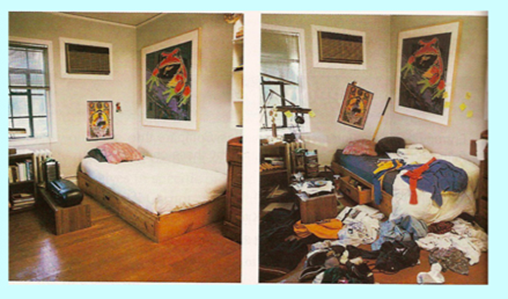

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)
log_p = -np.log2(p)

plt.plot(p, log_p)
plt.xlabel('Probability')
plt.ylabel('$-log_2(p)$');

### 정보이득 지수
* 엔트로피가 가장 작아지는 노드 선택
* Information Gain(정보 획득 량)
  * $𝐼𝐺(𝑇,𝑎)=𝐸(𝑇)−𝐸(𝑇,𝑎)$
  * 분리 전 엔트로피에서 분리 후 엔트로피를 빼기
    * 양수 : 엔트로피가 작아 졌다
    * 음수 : 엔트로피가 높아 졌다.
  * 분리 전, 후의 엔트로피가 작아지는 노드 선택
  * 처리할 수 있는 데이터 수가 가장 많은 노드
* 선택 갯수
  * 모든 특성이 경로에 포함 되어 있는 경우
  * 엔트로피가 0인 경로가 나온 경우


### 심장병 분류 실습 데이터
가슴통증, 혈액순환, 동맥경화를 조건으로 심장병을 분류

*  dataset

가슴통증 | 혈액순환 | 동맥경화| 심장질환
---|---|---|---
yes | yes | yes| yes
yes | yes | no| no
no | no | yes | no
no| yes|yes | no
yes|yes|no|no
yes |no|yes| no
no|no|yes|no
no| yes| no| no

### 심장병 분류-Entropy 계산
$$𝐸(심장질환)=𝐸(1, 7)=−\frac{1}{8}\log_2⁡(\frac{1}{8})−\frac{7}{8}\log_2⁡(\frac{7}{8}) \approx 0.543 $$
$$ \begin{align}
𝐼𝐺(심장질환, 가슴통증)&=𝐸(심장질환)−𝐸(심장질환,가슴통증) \\
&= 0.543−(\frac{4}{8} 𝐸(1, 3)+ \frac{4}{8} 𝐸(0, 4 )) \\
&= 0.543 −(\frac{4}{8} 0.811+0) \\
& \approx 0.138
\end{align}$$

$$\begin{align}
𝐼𝐺(심장질환, 혈액순환) &=𝐸(심장질환)−𝐸(심장질환,혈액순환) \\
 				&=0.543− (\frac{5}{8} 𝐸(1, 4 )+ \frac{3}{8} 𝐸(0, 3))\\
 				&=0.543−(\frac{5}{8} 0.7219+0)\\
        & \approx 0.0917
\end{align}$$

$$\begin{align}
 𝐼𝐺(심장질환, 동맥경화) &=𝐸(심장질환)−𝐸(심장질환,동맥경화)	\\
 &=0.543−  (\frac{5}{8} 𝐸(1, 4 )+\frac{3}{8} 𝐸(0, 3))   \\
 &=0.543−(\frac{5}{8}0.7219+0) \\
 & \approx 0.0917
\end{align}$$

* 가슴통증을 Root Node로 선정



In [ ]:
-1/8*np.log2(1/8) - 7/8*np.log2(7/8) # entropy 심장질환

In [ ]:
-3/4*np.log2(3/4) - 1/4*np.log2(1/4) # entropy 가슴통증

In [ ]:
-1/5*np.log2(1/5) - 4/5*np.log2(4/5) # entropy 혈액순환

In [ ]:
0.543- (5/8*(-1/5*np.log2(1/5) - 4/5*np.log2(4/5)))

### 심장병 분류 - Entropy

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1,1,1],
              [1,1,0],
              [0,0,1],
              [0,1,1],
              [1,1,0],
              [1,0,1],
              [0,0,1],
              [0,1,0]])
y = [1,0,0,0,0,0,0,0]
print(X, y)



### 트리 시각화(Entropy)

In [ ]:
showTree(tree_ent,
         feature_names=["가슴통증", "혈액순환", "동맥경화"],
         class_names=["No", "Yes"])

## Max Depth
* Breaset Cancer

In [ ]:
seed = 42
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                        cancer.target,
                                                        stratify=cancer.target,
                                                        random_state=seed)


In [ ]:
showTree(tree, feature_names=cancer.feature_names, class_names=cancer.target_names)

## Feature importances 시각화

In [ ]:
display("feature importance:", tree.feature_importances_)
df=pd.DataFrame(tree.feature_importances_, index=cancer.feature_names, columns=['importance'])
display(df.query('importance!=0'))
df.query('importance!=0').plot.barh();

# Regression Tree(회귀 트리)
* 비선형 데이터에 효과적
* 특정 값(𝑠)으로 영역($𝑅_1,𝑅_2$)을 나누고
  * $𝑅_1 (𝑗,𝑠)=\{𝑋:𝑋_𝑗<𝑠\}$
  * $𝑅_2 (𝑗,𝑠)=\{𝑋:𝑋_𝑗≥𝑠\} $
* 각 영역의 평균($\hat{𝑦}_{𝑅_1}, \hat{𝑦}_{𝑅_2}$)과 각 데이터의 잔차 계산
  * $∑_{𝑥_𝑖∈𝑅_1}(𝑦_𝑖  − \hat{𝑦}_{𝑅_1})^2+∑_{𝑥_𝑖∈𝑅_2}(𝑦_𝑖  − \hat{𝑦}_{𝑅_2})^2$
* 잔차(Residual)가 가장 작은 영역으로 분할

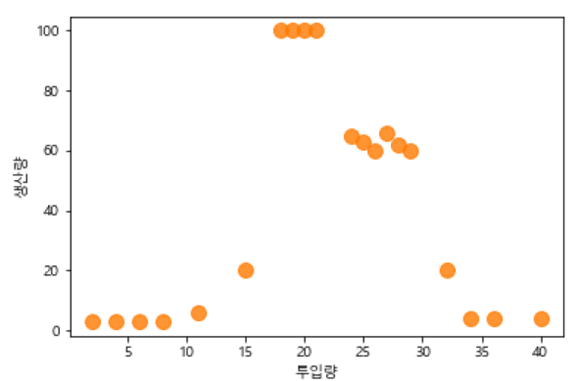

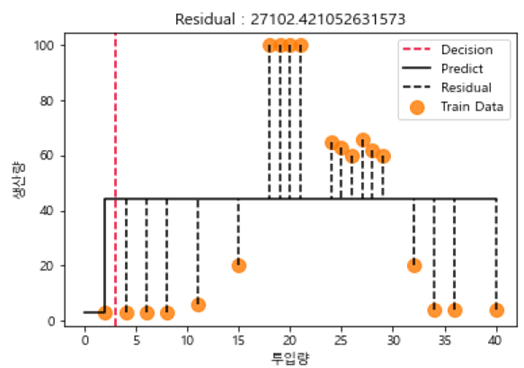

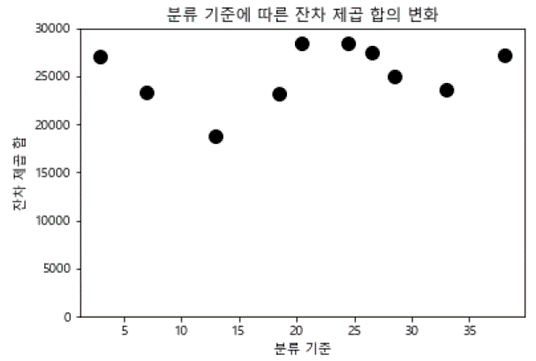

* 분할 결과
* 과적합 대비위해 가지치기(pruning) 필수
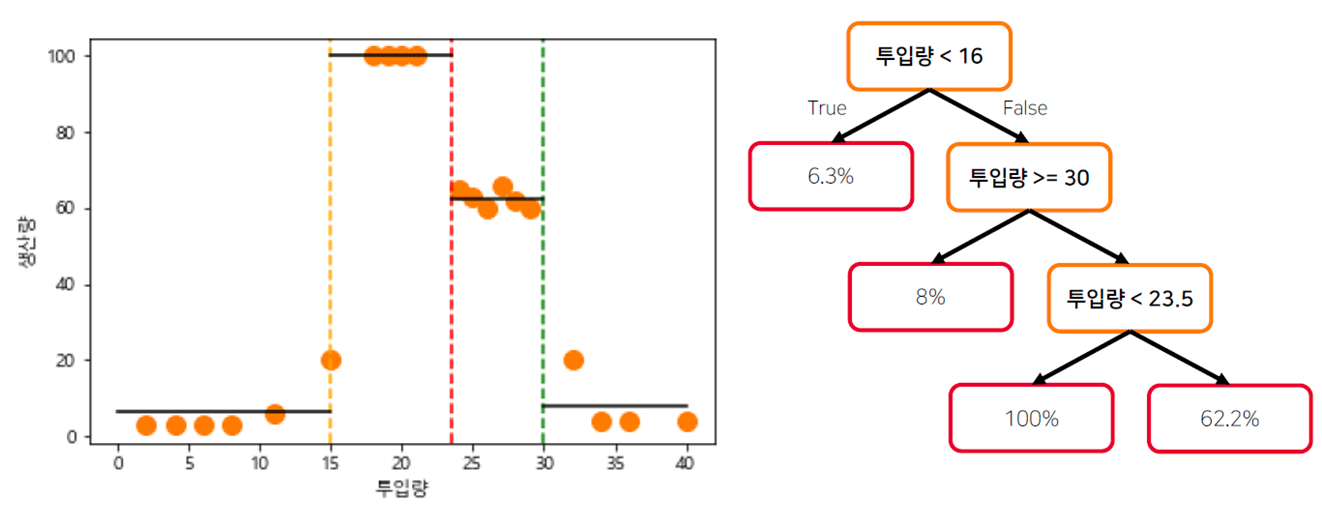

## DecisionTreeRegressor
* [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor)
* random 수 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

np.random.seed(2)
n = 80
X = np.sort(5 * np.random.rand(n, 1), axis=0)
y = np.sin(X).ravel() + np.random.rand(n)

plt.plot(X, y, 'o', label='data')

X_test = np.expand_dims(np.arange(0,5,0.01), axis=1)

## Regression Tree 보스턴 주택 가격

In [ ]:
!pip install -U boston
from boston import load_boston

In [ ]:
boston = load_boston()
X = StandardScaler().fit_transform(boston.data)

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, random_state=1)

